In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

In [2]:
df=pd.read_csv('C:\\Users\\santu\\OneDrive\\Desktop\\task\\happiness_score_dataset.csv')
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.shape

(158, 12)

C:\Users\santu\AppData\Local\Temp\ipykernel_3688\2341595041.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(happiness_score,shade=True,color='red')


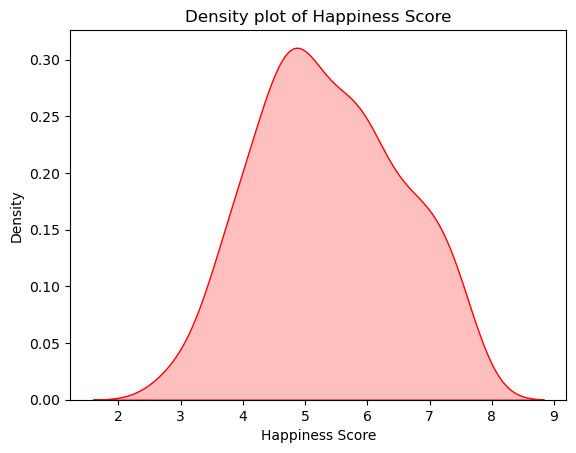

In [7]:
happiness_score=df['Happiness Score']
sns.kdeplot(happiness_score,shade=True,color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.title('Density plot of Happiness Score')
plt.show()

In [8]:
def plot_columnwise(df,nGraphShown,nGraphPerRow):
    nunique=df.nunique()
    df=df[[col for col in df if nunique[col]>1 and nunique[col]<50]]
    nRow,nCol=df.shape
    columnNames=list(df)
    nGraphRow=(nCol + nGraphPerRow - 1)//nGraphPerRow
    plt.figure(num=None, figsize=(6*nGraphPerRow,8*nGraphRow),dpi=80,facecolor='w',edgecolor='k')
    for i in range(min(nCol,nGraphShown)):
        plt.subplot(nGraphRow,nGraphPerRow, i+1)
        columnDf=df.iloc[:,i]
        if(not np.issubdtype(type(columnDf.iloc[0]),np.number)):
            valueCounts=columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            plt.ylabel('counts')
            plt.xticks(rotation=90)
            plt.title(f'{columnNames[i]}(column{i})')
        plt.tight_layout(pad=1.0,w_pad=1.0,h_pad=1.0)
        plt.show()

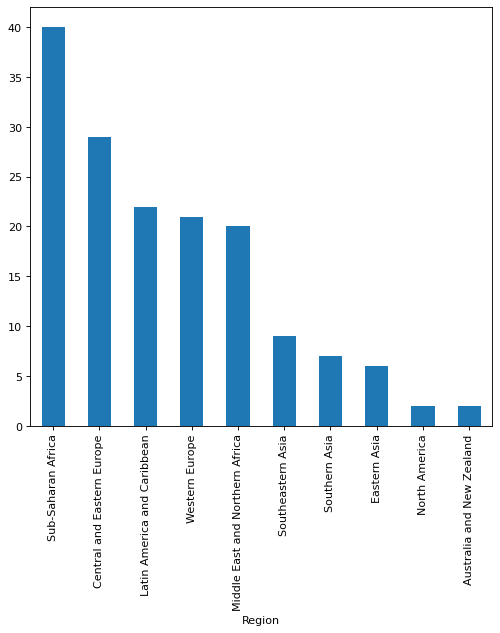

In [9]:
plot_columnwise(df,10,5)

In [10]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


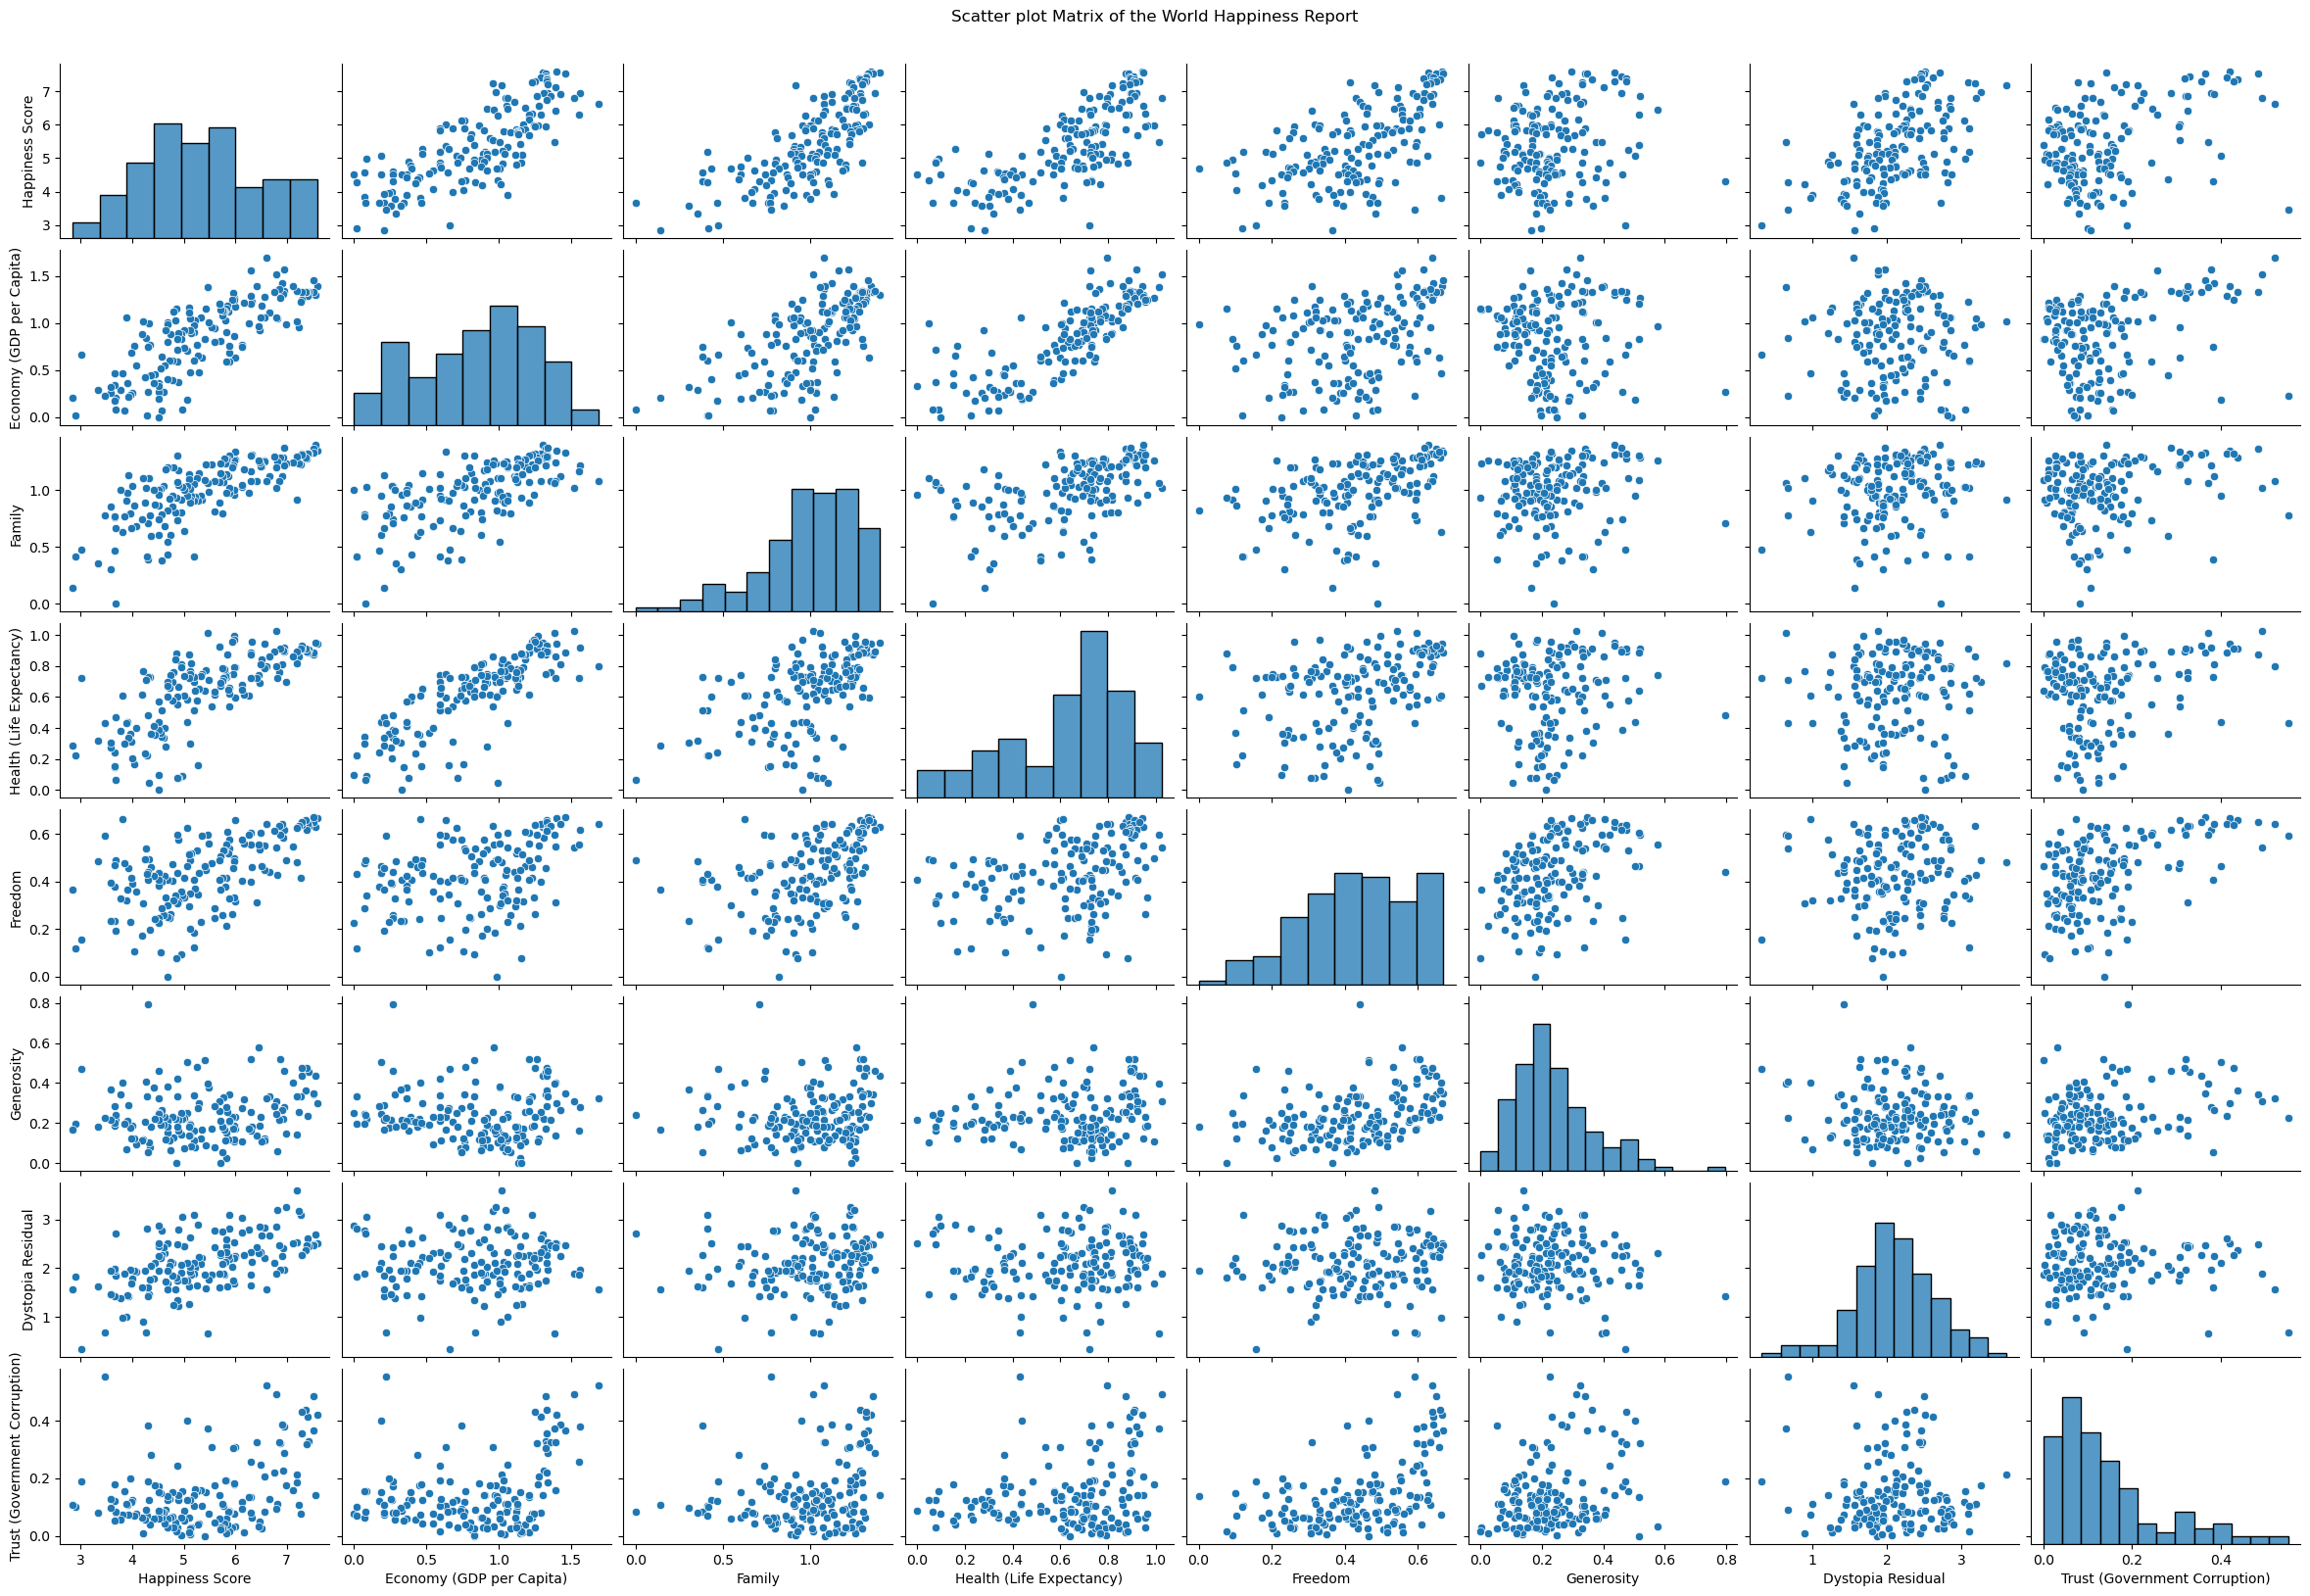

In [11]:
columns_to_include=['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Dystopia Residual','Trust (Government Corruption)']
sns.pairplot(df[columns_to_include],height=2,aspect=1.5)
plt.suptitle('Scatter plot Matrix of the World Happiness Report',y=1.02)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [13]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df['Country']=le.fit_transform(df['Country'])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


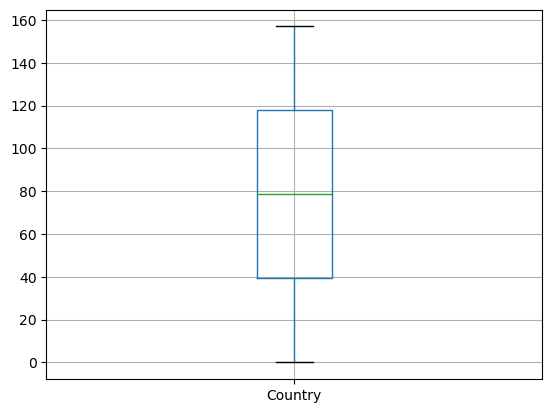

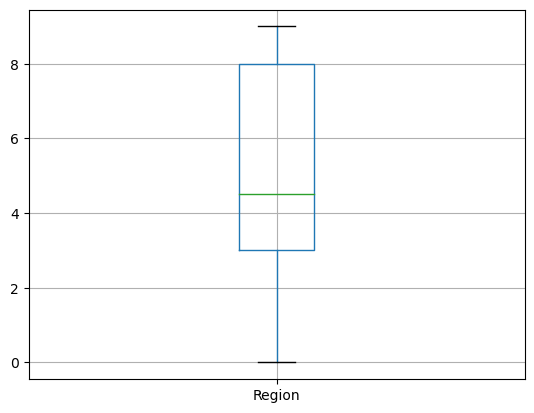

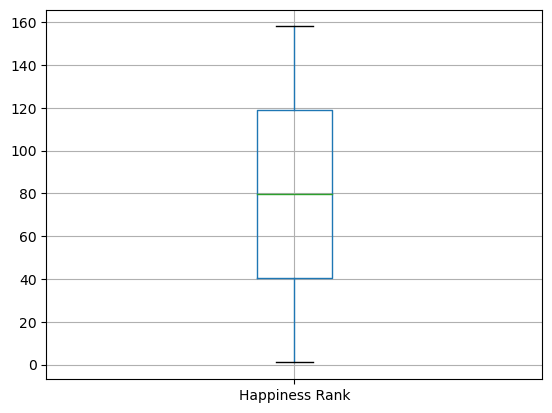

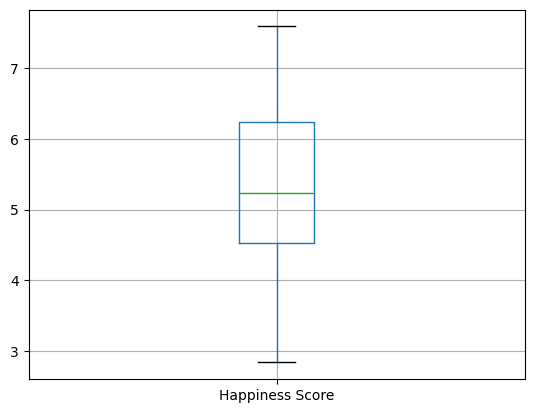

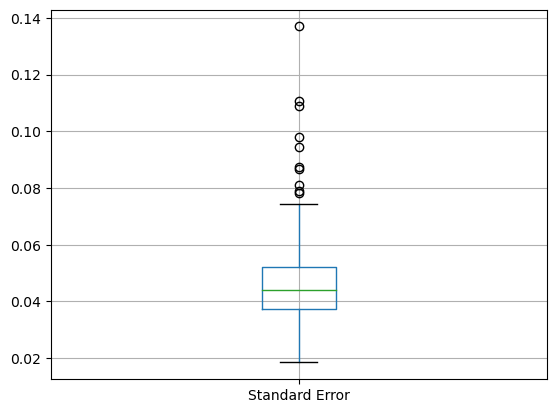

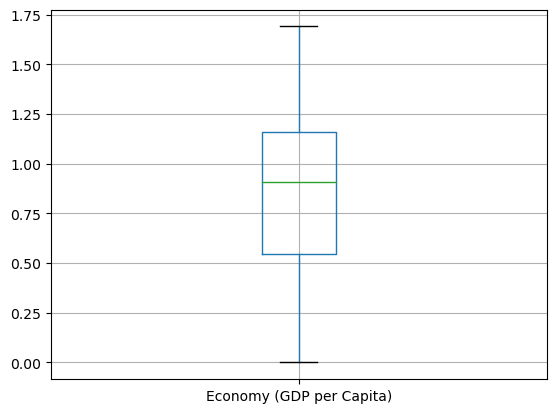

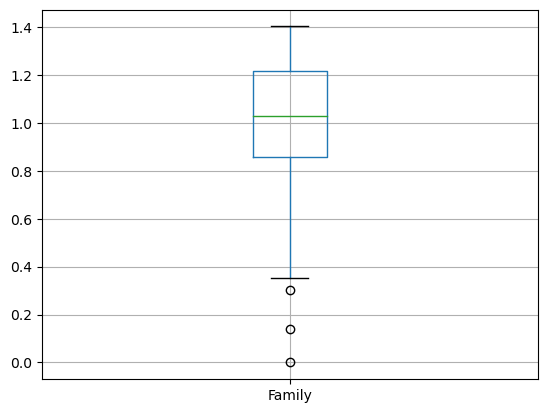

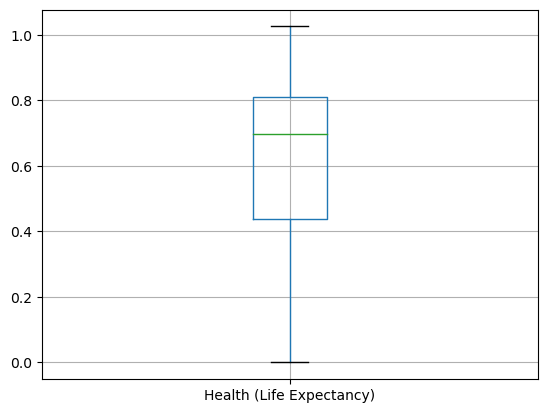

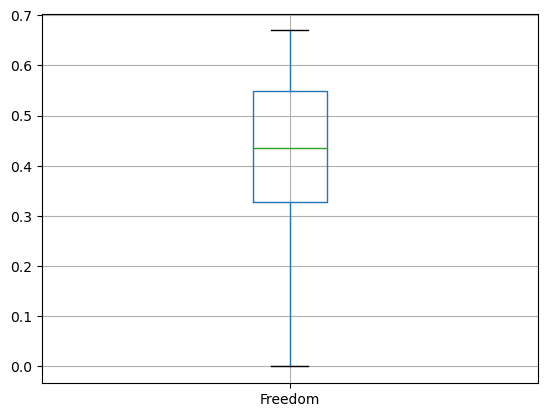

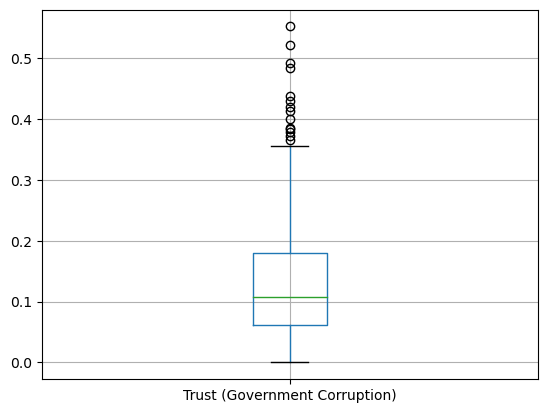

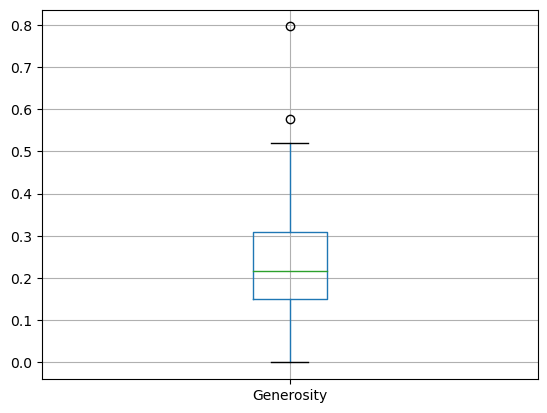

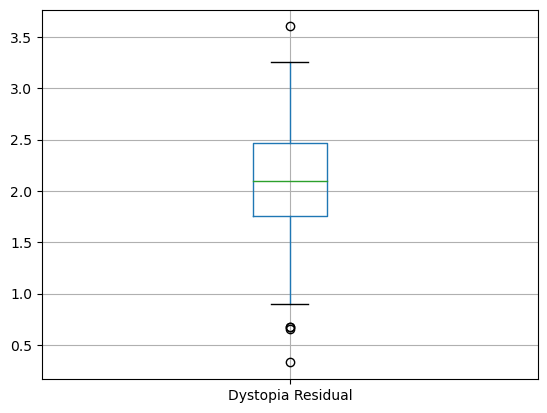

In [14]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [15]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']
x.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [19]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [23]:
r2_score(y_train,y_train_pred)*100

100.0

In [24]:
mean_squared_error(y_train,y_train_pred)

0.0

In [25]:
r2_score(y_test,y_test_pred)*100

99.63210564424688

In [26]:
mean_squared_error(y_test,y_test_pred)

0.004897354166666667

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

In [28]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)

In [30]:
r2_score(y_train,y_train_pred)*100

99.89758274219471

In [31]:
mean_squared_error(y_train,y_train_pred)

0.0013077514981817905

In [32]:
mean_absolute_error(y_test,y_test_pred)

0.05014958333333381

In [33]:
r2_score(y_test,y_test_pred)*100

99.51774792463739

In [34]:
mse=mean_squared_error(y_test,y_test_pred)
print(mse)

0.006419666879166671


In [35]:
rmse=sqrt(mse)
print(rmse)

0.08012282370939426


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error
model=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[50,100,200],
           'max_depth':[None,10,20,30],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4],
           'max_features':['auto','sqrt','log2']}
scorer=make_scorer(mean_squared_error,greater_is_better=False)
grid_search=GridSearchCV(model,param_grid,scoring=scorer,cv=5)
grid_search.fit(x,y)
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_
print('Best Hyperparameters:',best_params)
print('Best Model:',best_model)


C:\Users\santu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\santu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\santu\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\santu\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\santu\anaconda3\Lib\site-packa

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model: RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      random_state=42)


In [37]:
from sklearn.model_selection import cross_val_score
model=RandomForestRegressor(random_state=42)
scores=cross_val_score(model,x,y,cv=5,scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-scores)
print(rmse_scores)

[0.71985686 0.30197233 0.28300866 0.21729802 0.72209794]


In [38]:
xg_reg=xgb.XGBRegressor()


In [39]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)